### Importamos las librerias de Python que usaremos en el proyecto para explorar, analizar y crear visualizaciones con los datos extraidos de nuestro dataset. 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sbs 
import matplotlib.pyplot as plt

### Creamos una variable que almacena el conjunto de datos. 
### Luego mediante el metodo 'read_excel' de la libreria Pandas obtenemos los datos del archivo Excel en formato DataFrame. 
### Tomamos una muestra de 10 filas para tener una primer visual de la informacion. 

In [2]:
df = pd.read_excel('car_evaluation.xlsx')
df.sample(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
1055,med,high,5more,2,med,low,unacc
577,high,high,3,4,small,high,acc
1194,med,low,2,2,big,med,unacc
1372,low,vhigh,4,more,med,high,acc
794,high,low,3,4,med,low,unacc
1294,med,low,5more,more,big,high,vgood
961,med,vhigh,5more,4,big,high,acc
329,vhigh,low,2,2,big,low,unacc
1361,low,vhigh,4,4,med,low,unacc
1101,med,med,2,more,med,med,acc


### Ejecutamos metodo info() sobre la variable 'df' que contiene el DataFrame con los datos, con el fin de interiorizarnos a cerca de los tipos de datos como asi tambien para identificar la presencia o ausencia de valores nulos. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Aplicamos metodo 'describe' para una tener primera vision estadistica de los datos. 

In [4]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### Double-check sobre la existencia de valores nulos

In [5]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

### Comenzamos el tratamiento de los datos renombrando las columnas para mejor entendimiento

In [6]:
df.rename(columns = {'vhigh': 'buying', 
                     'vhigh.1': 'maint', 
                     2: 'doors', 
                     '2.1':'persons', 
                     'small':'lug_boot', 
                     'low':'safety', 
                     'unacc': 'class'},
          inplace = True)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


### Reemplazamos los valores '5more' en formato string de la columna 'doors', por '5' en formato numerico y luego chequeamos que los cambios hayan sido aplicados. 

In [7]:
df['doors'] = df['doors'].replace('5more', 5,).astype(int)

df 

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5,more,med,med,good
1723,low,low,5,more,med,high,vgood
1724,low,low,5,more,big,low,unacc
1725,low,low,5,more,big,med,good


In [8]:
df['doors'].dtype

dtype('int64')

### Utilizando el metodo 'replace', reemplazamos los valores '2' por '3' en la columna 'doors' para homogeneizar la informacion ya que consideramos que '3' es el minimo de puertas que tiene un automovil standard y '5' el maximo. 

In [9]:
df['doors'].replace(2, 3, inplace = True) 

df 

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,3,2,small,med,unacc
1,vhigh,vhigh,3,2,small,high,unacc
2,vhigh,vhigh,3,2,med,low,unacc
3,vhigh,vhigh,3,2,med,med,unacc
4,vhigh,vhigh,3,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5,more,med,med,good
1723,low,low,5,more,med,high,vgood
1724,low,low,5,more,big,low,unacc
1725,low,low,5,more,big,med,good


### Creamos una nueva variable sobre la cual construimos una funcion 'lambda' que recorre todas las columnas del DataFrame y nos trae los valores unicos de cada columna. 

In [10]:
valores_unicos = df[['buying', 'maint', 'doors',
                     'persons','lug_boot', 'safety',
                     'class']].apply(lambda col: col.unique())

valores_unicos

buying        [vhigh, high, med, low]
maint         [vhigh, high, med, low]
doors                       [3, 4, 5]
persons                  [2, 4, more]
lug_boot            [small, med, big]
safety               [med, high, low]
class       [unacc, acc, vgood, good]
dtype: object

### Realizamos conteos de valores sobre las columnas del DataFrame, pero aplicando distintas metodologias y ofreciendo diversos resultados en funcion de lo que se pretenda obtener: 

#### 1) Metodo 'value_counts': 

In [11]:
df['safety'].value_counts()

safety
med     576
high    576
low     575
Name: count, dtype: int64

In [12]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

#### 2) Metodo 'value_counts' en formato DataFrame y con un indice agregado.  

In [13]:
# Convertimos value_counts() a un DataFrame
doors_counts = df['doors'].value_counts().reset_index()

# Renombramos las columnas para mayor claridad
doors_counts.columns = ['Doors', 'Count']

# Ordenamos por el número de puertas (opcional)
doors_counts = doors_counts.sort_values('Doors')

# Mostramos el DataFrame resultante
doors_counts

,Doors,Count
0,3,863
1,4,432
2,5,432


   df['doors'].value_counts() 
   
cuenta las ocurrencias de cada valor único en la columna 'doors'.

    .reset_index() 
convierte la Serie resultante en un DataFrame, donde el índice original (los valores únicos de 'doors') se convierte en una columna.

Renombramos las columnas para que sean más descriptivas. La columna de valores se llama 'Doors' y la columna de conteos se llama 'Count'.

Opcionalmente, ordenamos el DataFrame por el número de puertas para una mejor visual


#### 3) Metodo 'value_counts' en formato DataFrame con indice + una columna agregada que, mediante el uso de una funcion 'lambda', detalla los porcentajes del recuento cada valor sobre el total. 

In [14]:
# Convertir value_counts() a un DataFrame con porcentajes
doors_counts = df['doors'].value_counts(normalize=True).reset_index()
doors_counts.columns = ['Doors', 'Percentage']

# Añadir la columna de conteo
doors_counts['Count'] = df['doors'].value_counts().values

# Formatear el porcentaje como un string con símbolo de porcentaje
doors_counts['Percentage'] = doors_counts['Percentage'].apply(lambda x: f"{x:.2%}")

# Ordenar por el número de puertas
doors_counts = doors_counts.sort_values('Doors')

doors_counts

,Doors,Percentage,Count
0,3,49.97%,863
1,4,25.01%,432
2,5,25.01%,432


#### 4) En este caso el conteo se realiza de forma cruzada, a partir de una doble clasificacion: 
     a) en funcion del tipo de baul,  
     b) luego en funcion de la cantidad de puertas que tenga el vehiculo. 
#### Se incluye al final un recuento total sobre cada par de variables y un total sobre todo el dataframe. 

In [15]:
pd.crosstab(index= df['doors'],
            columns=df['lug_boot'], margins=True)

lug_boot,big,med,small,All
doors,,,,
3,288,288,287,863
4,144,144,144,432
5,144,144,144,432
All,576,576,575,1727


In [16]:
pd.crosstab(index= df['class'],
            columns=df['buying'], margins=True)

buying,high,low,med,vhigh,All
class,,,,,
acc,108,89,115,72,384
good,0,46,23,0,69
unacc,324,258,268,359,1209
vgood,0,39,26,0,65
All,432,432,432,431,1727


## Visualizaciones con Seaborn y Matplotlib

#### 1) Realizamos un grafico de torta con el objetivo de presentar cuales son porcentualmente los autos mas vendidos en funcion de la cantidad de puertas. 

In [17]:
doors_3 = (df['doors'] == 3).sum()
doors_4 = (df['doors'] == 4).sum()
doors_5 = (df['doors'] == 5).sum()
print('Total de autos con 3:', doors_3)
print('Total de autos con 4 puertas:', doors_4)
print('Total de autos con 5 puertas:', doors_5)

Total de autos con 3: 863
Total de autos con 4 puertas: 432
Total de autos con 5 puertas: 432


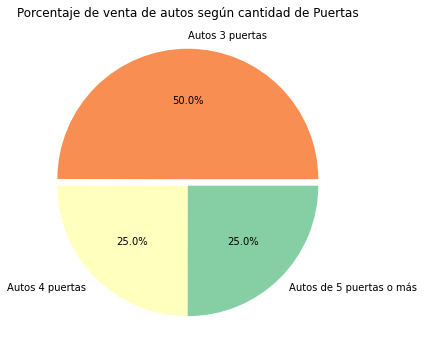

In [18]:
# Elegimos tamaño del grafico
plt.figure(figsize=(10,6)) 

# Agregamos etiquetas
labels = ['Autos 3 puertas', 'Autos 4 puertas', 'Autos de 5 puertas o más' ] 
sizes = [doors_3, doors_4, doors_5]

# Podemos “explotar” el grafico para una mejor visualizacion
explode = [0.05, 0, 0]

# Detallamos los porcentajes para cada categoria con el argumento autopct
colors = sbs.color_palette('Spectral', len(sizes))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode, colors = colors)
plt.title('Porcentaje de venta de autos según cantidad de Puertas')

# Mostamos el resultado 
plt.show() 

####  2) Elegimos un grafico de columnas con el objetivo de representar la cantidad de automoviles producidos de acuerdo al criterio de aceptacion de la marca 

/var/folders/2d/p3zg32ds4p598pyxblpsp5ph0000gn/T/ipykernel_7126/3110367608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbs.countplot(x = df['class'], palette = 'Spectral')


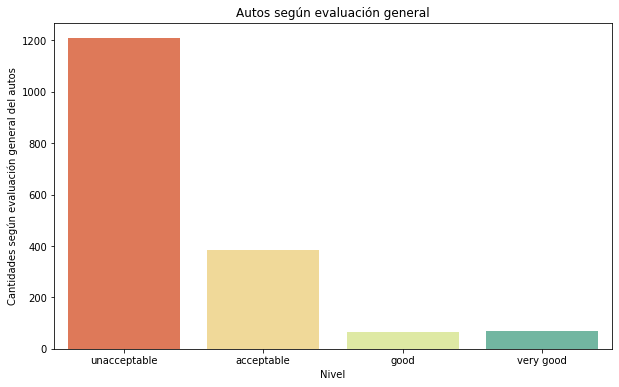

In [19]:
# Tomamos como parametro la columna 'class'

# Definimos tamaño, parametros y paleta colores 
plt.figure(figsize=(10,6))
sbs.countplot(x = df['class'], palette = 'Spectral')

# Colocamos Títulos y Leyendas
plt.title('Autos según evaluación general')
plt.xlabel('Nivel')
plt.ylabel('Cantidades según evaluación general del autos')

plt.xticks(np.arange(4),['unacceptable', 'acceptable', 'good', 'very good'])
plt.show() # Mostramos el resultado 

In [20]:
pd.crosstab(df['class'], df['safety']) # Evaluamos realizar un mapa de calor mostrando la relacion entre estas 2 categorias

safety,high,low,med
class,,,
acc,204,0,180
good,30,0,39
unacc,277,575,357
vgood,65,0,0


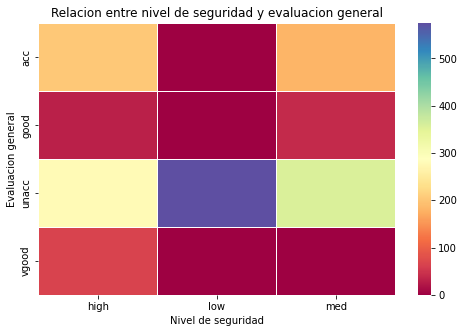

In [21]:
# Creamos un crosstab between 'class' y 'safety'
cross_tab = pd.crosstab(df['class'], df['safety'])

# Creamos el mapa de calor
plt.figure(figsize=(8, 5))
sbs.heatmap(cross_tab, annot=False, cmap='Spectral', linewidths=.5)

# Agregamos titulos y leyendas
plt.title('Relacion entre nivel de seguridad y evaluacion general')
plt.xlabel('Nivel de seguridad')
plt.ylabel('Evaluacion general')

# Mostramos el resultado
plt.show()

### Finalmente escogimos un grafico de tipo 'subplots' para poder visualizar en simultaneo 3 clasificaciones:

   1) Automoviles de acuerdo a la cantidad de personas
   2) Clasificacion de los autos en terminos de 4 categorias de precios 
   3) Clasificacion segun 3 niveles de seguridad 

/var/folders/2d/p3zg32ds4p598pyxblpsp5ph0000gn/T/ipykernel_7126/1061819244.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot2grid((1, 3),(0,0))


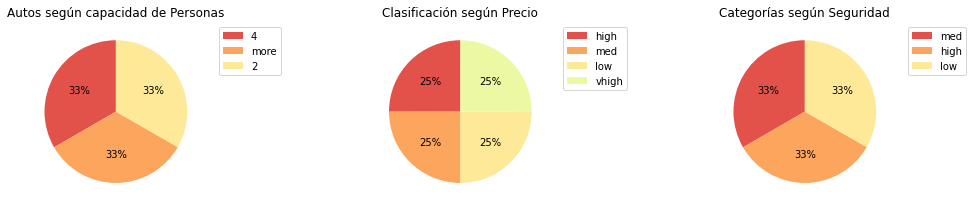

In [22]:
# Definimos los parametros de los graficos

# tamaño y la cantidad de graficos. 
fig, ax = plt.subplots(figsize=(15, 3)) 
# Ocultamos los ejes
ax.axis('off')
# Ocultamos las rejillas
ax.grid(False)
 
ax0 = plt.subplot2grid((1, 3),(0,0))
count = df['persons'].value_counts()
labels = count.index
plt.pie(x=count, labels=None, autopct='%.0f%%', 
        startangle=90, colors=sbs.color_palette("Spectral"))
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Autos según capacidad de Personas')

ax1 = plt.subplot2grid((1, 3), (0, 1))
count = df['buying'].value_counts()
labels = count.index
plt.pie(x=count, labels=None, autopct='%.0f%%', 
        startangle=90, colors=sbs.color_palette('Spectral'))
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Clasificación según Precio')
        
ax2 = plt.subplot2grid((1, 3), (0, 2))
count = df['safety'].value_counts()
labels = count.index
plt.pie(x=count, labels=None, autopct='%.0f%%', 
        startangle=90, colors=sbs.color_palette("Spectral"))
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Categorías según Seguridad')

plt.tight_layout()